In [12]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/HR_Job_Placement_Dataset.csv')

df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

df = df.drop_duplicates()

num_cols = df.select_dtypes(include=["number"]).columns
obj_cols = df.select_dtypes(include=["object"]).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[obj_cols] = df[obj_cols].fillna("")

df.to_csv("cleaned_data.csv", index=False)
print("executed")

executed


In [6]:
import pandas as pd

df = pd.read_csv('/content/cleaned_data.csv')

print(df.head())
print(df.info())


   age_years  gender  ssc_percentage  hsc_percentage  degree_percentage  \
0         27    Male       65.061656       83.842578          75.856526   
1         24    Male       67.885626       64.973305          73.093588   
2         33  Female       73.892471       68.834121          90.196460   
3         31    Male       74.145568       76.255126          75.586731   
4         28    Male       60.475937       65.786336          80.801010   

    degree_specialization  technical_score  aptitude_score  \
0        Computer Science        58.221909       89.566305   
1             Electronics        71.927978       54.591971   
2  Information Technology        72.445041       58.587088   
3              Mechanical        78.855676       61.022065   
4  Information Technology        68.286776       65.713731   

   communication_score  skills_match_percentage  ...  expected_ctc_lpa  \
0            64.474484                79.548913  ...          5.805850   
1            61.077306      

In [8]:
df.columns

Index(['age_years', 'gender', 'ssc_percentage', 'hsc_percentage',
       'degree_percentage', 'degree_specialization', 'technical_score',
       'aptitude_score', 'communication_score', 'skills_match_percentage',
       'certifications_count', 'internship_experience', 'years_of_experience',
       'career_switch_willingness', 'relevant_experience', 'previous_ctc_lpa',
       'expected_ctc_lpa', 'company_tier', 'job_role_match',
       'competition_level', 'bond_requirement', 'notice_period_days',
       'layoff_history', 'employment_gap_months', 'relocation_willingness',
       'status'],
      dtype='object')

status
Not Placed    34950
Placed        15174
Name: count, dtype: int64


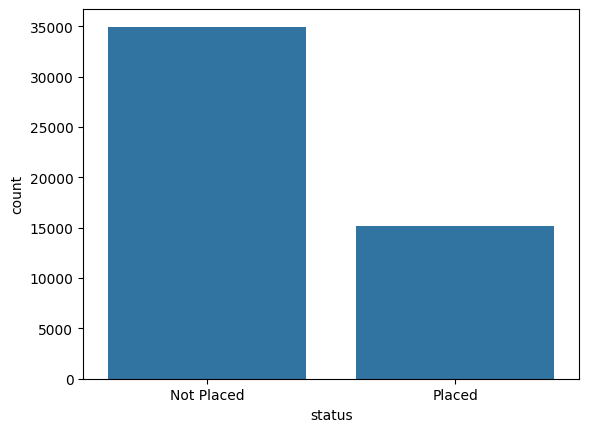

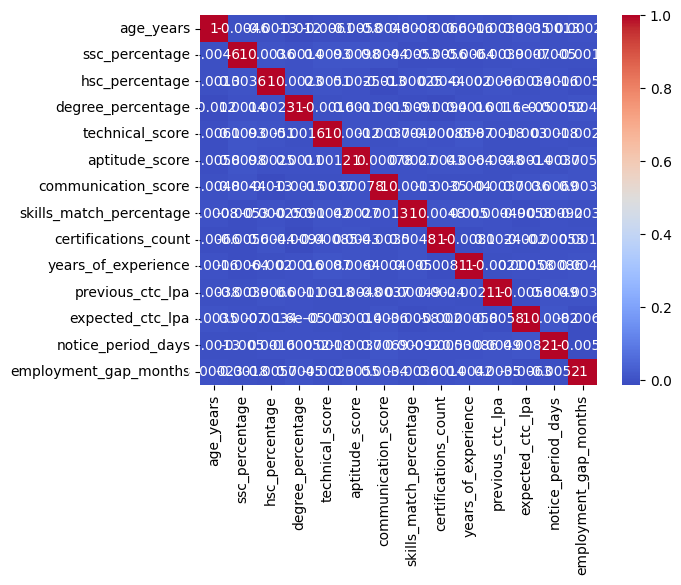

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['status'].value_counts())
sns.countplot(x='status', data=df)
plt.show()

num_cols = df.select_dtypes(include=["number"]).columns
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.show()


In [10]:

cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df[col] = df[col].astype('category').cat.codes


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop('status', axis=1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8969576059850374
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7033
           1       0.87      0.77      0.82      2992

    accuracy                           0.90     10025
   macro avg       0.89      0.86      0.87     10025
weighted avg       0.90      0.90      0.90     10025



In [13]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7033
           1       0.87      0.77      0.82      2992

    accuracy                           0.90     10025
   macro avg       0.89      0.86      0.87     10025
weighted avg       0.90      0.90      0.90     10025



                      feature  importance
6             technical_score    0.245544
12        years_of_experience    0.129745
9     skills_match_percentage    0.090415
16           expected_ctc_lpa    0.066006
8         communication_score    0.049296
15           previous_ctc_lpa    0.046891
18             job_role_match    0.043570
7              aptitude_score    0.033646
4           degree_percentage    0.031944
2              ssc_percentage    0.031463
3              hsc_percentage    0.030813
11      internship_experience    0.025917
14        relevant_experience    0.023482
0                   age_years    0.020681
22             layoff_history    0.018616
23      employment_gap_months    0.014924
21         notice_period_days    0.013764
5       degree_specialization    0.013217
10       certifications_count    0.012978
19          competition_level    0.011672
13  career_switch_willingness    0.010129
24     relocation_willingness    0.010099
17               company_tier    0

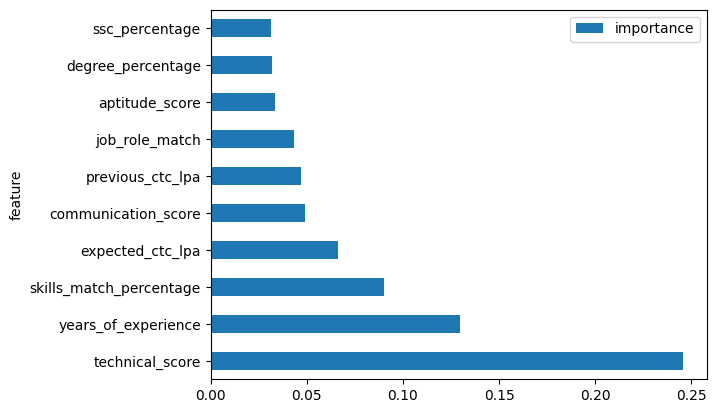

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.DataFrame({
    "feature": X.columns,
    "importance": model.feature_importances_
}).sort_values(by="importance", ascending=False)

print(importance)

importance.head(10).plot(kind="barh", x="feature", y="importance")
plt.show()


In [15]:
df["predicted_status"] = model.predict(X)
df.to_csv("final_output.csv", index=False)


In [16]:
df = pd.read_csv('/content/final_output.csv')

In [18]:
df.head()

,age_years,gender,ssc_percentage,hsc_percentage,degree_percentage,degree_specialization,technical_score,aptitude_score,communication_score,skills_match_percentage,...,company_tier,job_role_match,competition_level,bond_requirement,notice_period_days,layoff_history,employment_gap_months,relocation_willingness,status,predicted_status
0,27,Male,65.061656,83.842578,75.856526,Computer Science,58.221909,89.566305,64.474484,79.548913,...,Tier 3,Not Matched,Medium,Not Required,15.0,No,18.0,Not Willing,Not Placed,0
1,24,Male,67.885626,64.973305,73.093588,Electronics,71.927978,54.591971,61.077306,73.316134,...,Tier 1,Matched,High,Required,0.0,NaN,0.0,Not Willing,Not Placed,0
2,33,Female,73.892471,68.834121,90.196460,Information Technology,72.445041,58.587088,79.494739,75.466980,...,Tier 3,Not Matched,Low,Not Required,0.0,No,3.0,Not Willing,Placed,1
3,31,Male,74.145568,76.255126,75.586731,Mechanical,78.855676,61.022065,53.740386,73.676449,...,Tier 2,Matched,Low,Not Required,0.0,Yes,6.0,NaN,Not Placed,0
4,28,Male,60.475937,65.786336,80.801010,Information Technology,68.286776,65.713731,61.438314,88.994847,...,Tier 2,Matched,Medium,Not Required,0.0,No,3.0,Willing,Not Placed,0
